<a href="https://colab.research.google.com/github/eva-butler/CS4774/blob/main/CS_4774_Codeathon_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Codeathon 1: Comparison of Regression Models on Housing Prices in Ames, Iowa

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![(Image Credit Boston.gov)](https://miro.medium.com/max/1000/1*WYZCnpM7bE3Wq4NNxx7jDA.jpeg)

In this assignment, You are in charge of building a system to predict housing prices in Ames, Iowa. You need to find the best model given the Iowa Housing dataset, and then see if you can improve its performance further by tuning its hyperparameters.  You must evaluate your model using RMSE with 5-fold cross-validation. You can use Python’s Scikit-Learn API and Google Colab to present your solution and performance to your peers.

* **DOWNLOAD**: Download from Kaggle the Iowa Housing datasetLinks to an external site. in the [Ames Housing Dataset on Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data). You will attempt to predict the housing prices in Ames, IA. For references, you may refer to my slides or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same Colab workspace.

* **CODE**: Using this provided template, apply the 8 main steps of an ML project on the selected data set. Write code in a Google Colab, download as a .ipynb file and submit via GradeScope before the deadline. For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 50 pts. You will gain points depending on how you perform in the following sections.

* **PRESENT** (Optional): In a later class meeting, give a lightning talk to pitch your solution in 3-5 minutes. Prepare a presentation (in Google Slides) and email me the URL to be considered (3-5 submissions will be selected to present). You will earn 10 bonus points if you are not already one of the top 10 submissions.

**BONUS POINTS:** 10 bonus points will be given (as Extra credits) for those who score among the top-10 leaderboard while following strictly the assignment guidelines. Best of luck to all!

**IMPORTANT**: You must name your submission yourUVAID_codeathon_1.ipynb








## Step 1: Big Picture and Setup
Write a paragraph explaining the context of the problem in which you are trying to investigate. Your paragraph may frame the problem and objectives by answering the following questions:
* What is the task: regression, classification, clustering, visualization?
* What to expect, how to use, and how to benefit from this model?
* What performance measure to evaluate?
* How much data is available or should be collected?
* What learning algorithm to be used?
* How much effort is to be spent?
* Verify the assumptions that have been made about the context

The goal of this notebook is to predict the sale prices of homes in Ames, Iowa. In this project we will be using Regression to assist in building the model. From this model you should expect to get the sale price based on other information from the area. You could benefit from using this model if you were trying to move to a new area and wanted to determine which neighborhoods to look in based on the features your desire about your house. To measure the performance of the model, you would look at the RMSE for its ability to predict the sale price.  

As of right now, there is about 900 kB of data in the set. However, it would be relatively simple to connect this data set to the census. Because we have neighborhood information, we are able to connect those to zipcodes and therefore pull more information about the areas. 

This type of task is usually a supervised learning task because the model can be trained with labeled data. This is regression problem because we are trying to predict a numerical value. It is also a multivariate regression problem. 

Performance Measure: Because this problem is a regression based problem a good performance measure is root mean square error (RMSE). For this assignment, we will also be using 5-fold cross validation  

The amount of effort to be spent should be enough to create a model that performs with 90%+ accuracy. You want to build a great model, but you also have to balance that time with finding better data.

Assumptions: One assumption made is that the training data is representative of the real world data. There are only 1400 entries in this dataset, which is really not that much information to work off of. We assume that this data is clean and accurate. We assume that no one has altered the information and it is truthful. We have assumed that the data in this set is representative of all of the neighborhoods in Ames, Iowa, and it is not just specific to a smaller part of Ames. Many other assumptions were made on top of these. 

In [464]:
import sklearn
import numpy as np
import os 
np.random.seed(42)

%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt

## Step 2: Load the Data
We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing values?
 * What are some basic statistics you can learn right away about this dataset?

In [465]:
import pandas as pd

# To help you get started, a load function is provided below.
# You will need to fill in the code under #TODO to make it work.
def loadBostonHousingData():
  # The column names are adopted from the dataset page on Kaggle
  housing = pd.read_csv('train.csv')
  return housing

housing_train = loadBostonHousingData()

housing_train.info() #setsize, number of features, and objects
print(housing_train.shape) #number of entries


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [466]:
housing_train.describe()
#here are the basic stats abt the data set

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [467]:
cat_cols = housing_train.select_dtypes(include=[object, 'category']).columns
print(cat_cols)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [468]:
missing_values= housing_train[housing_train.isnull().any(axis=1)]
print(missing_values)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neig

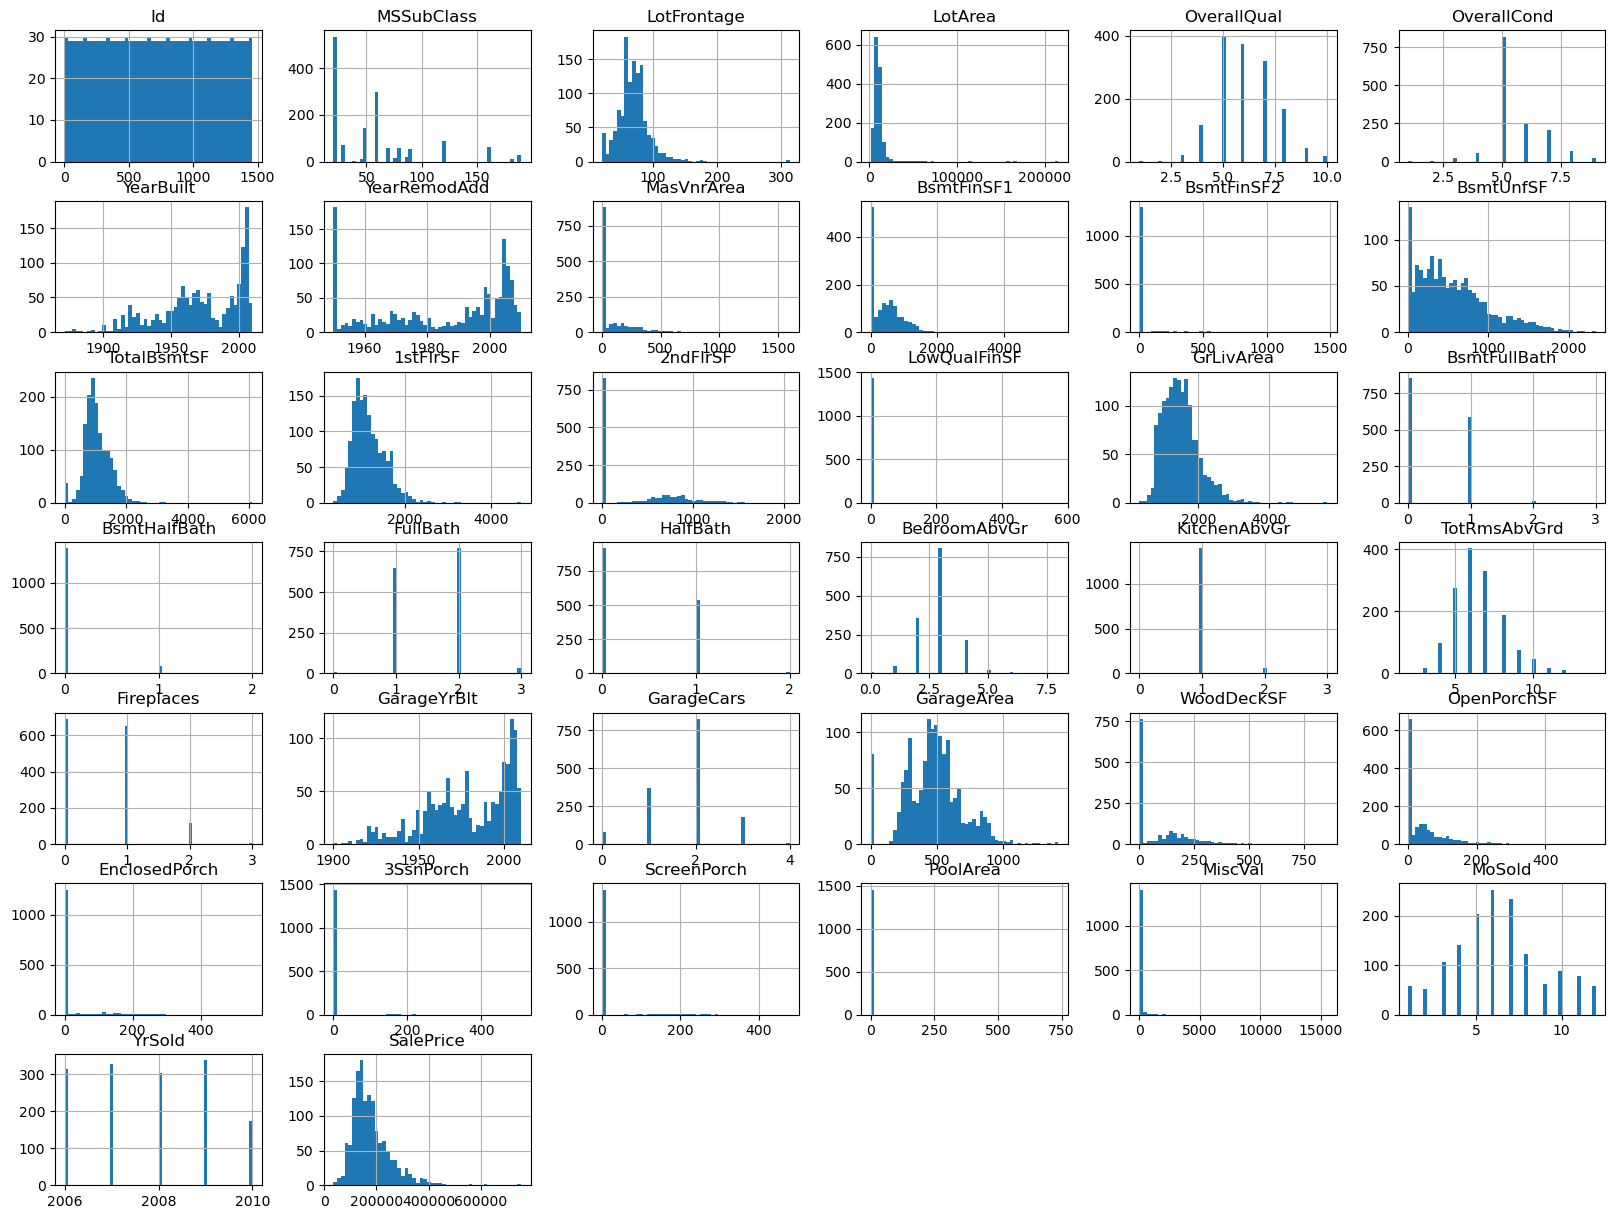

In [469]:
housing_train.hist(bins=50, figsize=(20,15))
plt.show()

In [470]:
print(housing_train.shape)
housing_train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [471]:
#Im going to split up the sets here before looking at the data too much. 

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing_train, test_size = 0.2, random_state = 42)

actual_train_set, validation_set = train_test_split(train_set, test_size = 0.2, random_state=42)

housing_train = actual_train_set.copy()
print(housing_train.shape)
print(test_set.shape)
print(validation_set.shape)

housing_train.head()


(934, 81)
(292, 81)
(234, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
251,252,120,RM,44.0,4750,Pave,NaN,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,TwnhsE,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,Stone,481.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1573,Unf,0,0,1573,GasA,Ex,Y,SBrkr,1625,0,0,1625,1,1,2,0,2,1,Gd,5,Typ,1,Gd,Attchd,2006.0,Fin,2,538,TA,TA,Y,123,0,0,0,153,0,NaN,NaN,NaN,0,12,2007,WD,Family,235000
861,862,190,RL,75.0,11625,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,2fmCon,1Story,5,4,1965,1965,Hip,CompShg,Plywood,HdBoard,NaN,0.0,TA,TA,PConc,TA,TA,Mn,BLQ,841,Unf,0,198,1039,GasA,Ex,Y,SBrkr,1039,0,0,1039,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Unf,2,504,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,131500
851,852,120,RL,NaN,3196,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,8,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,40.0,Gd,TA,PConc,Gd,TA,Gd,Unf,0,Unf,0,1273,1273,GasA,Ex,Y,SBrkr,1456,0,0,1456,0,0,2,0,2,1,Gd,7,Typ,1,TA,Attchd,2003.0,Fin,2,400,TA,TA,Y,143,20,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,215000
582,583,90,RL,81.0,11841,Grvl,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,SFoyer,6,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,BrkFace,104.0,TA,Gd,CBlock,Gd,TA,Av,GLQ,816,Unf,0,0,816,GasA,TA,Y,SBrkr,816,0,0,816,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,32,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,118500
326,327,120,RL,32.0,10846,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Veenker,Norm,Norm,TwnhsE,1Story,8,5,1993,1993,Gable,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1619,Unf,0,100,1719,GasA,Ex,Y,SBrkr,1719,0,0,1719,2,0,1,1,1,1,Gd,6,Typ,2,Gd,Attchd,1993.0,Fin,2,473,TA,TA,Y,122,30,0,0,0,0,NaN,NaN,NaN,0,5,2008,Con,Normal,324000


## Step 3. Discover and visualize the data to gain insights
**Data Discovery:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than others. This information will help you confirm the weights of your regression model later on.

In [472]:
housing_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
251,252,120,RM,44.0,4750,Pave,NaN,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,TwnhsE,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,Stone,481.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1573,Unf,0,0,1573,GasA,Ex,Y,SBrkr,1625,0,0,1625,1,1,2,0,2,1,Gd,5,Typ,1,Gd,Attchd,2006.0,Fin,2,538,TA,TA,Y,123,0,0,0,153,0,NaN,NaN,NaN,0,12,2007,WD,Family,235000
861,862,190,RL,75.0,11625,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,2fmCon,1Story,5,4,1965,1965,Hip,CompShg,Plywood,HdBoard,NaN,0.0,TA,TA,PConc,TA,TA,Mn,BLQ,841,Unf,0,198,1039,GasA,Ex,Y,SBrkr,1039,0,0,1039,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Unf,2,504,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,131500
851,852,120,RL,NaN,3196,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,8,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,40.0,Gd,TA,PConc,Gd,TA,Gd,Unf,0,Unf,0,1273,1273,GasA,Ex,Y,SBrkr,1456,0,0,1456,0,0,2,0,2,1,Gd,7,Typ,1,TA,Attchd,2003.0,Fin,2,400,TA,TA,Y,143,20,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,215000
582,583,90,RL,81.0,11841,Grvl,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,SFoyer,6,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,BrkFace,104.0,TA,Gd,CBlock,Gd,TA,Av,GLQ,816,Unf,0,0,816,GasA,TA,Y,SBrkr,816,0,0,816,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,32,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,118500
326,327,120,RL,32.0,10846,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Veenker,Norm,Norm,TwnhsE,1Story,8,5,1993,1993,Gable,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1619,Unf,0,100,1719,GasA,Ex,Y,SBrkr,1719,0,0,1719,2,0,1,1,1,1,Gd,6,Typ,2,Gd,Attchd,1993.0,Fin,2,473,TA,TA,Y,122,30,0,0,0,0,NaN,NaN,NaN,0,5,2008,Con,Normal,324000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,20,RL,60.0,6960,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1970,1970,Gable,CompShg,HdBoard,Plywood,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,375,BLQ,239,250,864,GasA,TA,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1989.0,Unf,2,660,TA,TA,Y,96,0,0,0,0,0,NaN,NaN,Shed,500,11,2009,WD,Normal,120500
401,402,20,RL,65.0,8767,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,24,Unf,0,1286,1310,GasA,Ex,Y,SBrkr,1310,0,0,1310,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2005.0,Fin,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,164990
957,958,20,RL,70.0,7420,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1962,1962,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,417,Unf,0,640,1057,GasA,TA,Y,SBrkr,1057,0,0,1057,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1977.0,Fin,2,576,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal,132000
992,993,60,RL,80.0,9760,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,2Story,6,8,1964,1993,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,340.0,TA,TA,CBlock,TA,TA,Gd,BLQ,536,Rec,117,169,822,GasA,Gd

In [473]:
# Your code to visualize the data here
corr_matrix = housing_train.corr(numeric_only=True)
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.777892
GrLivArea        0.674807
GarageCars       0.637454
GarageArea       0.616631
TotalBsmtSF      0.593411
1stFlrSF         0.588018
FullBath         0.550514
YearBuilt        0.515217
TotRmsAbvGrd     0.508304
YearRemodAdd     0.492897
GarageYrBlt      0.479604
Fireplaces       0.464652
MasVnrArea       0.440977
BsmtFinSF1       0.351121
LotFrontage      0.313306
WoodDeckSF       0.307913
2ndFlrSF         0.284592
OpenPorchSF      0.281425
HalfBath         0.266244
LotArea          0.239065
BsmtUnfSF        0.229066
BsmtFullBath     0.228611
BedroomAbvGr     0.157942
ScreenPorch      0.139919
PoolArea         0.131198
3SsnPorch        0.090449
MoSold           0.017851
BsmtFinSF2       0.010182
LowQualFinSF     0.009869
YrSold           0.003952
Id              -0.008787
MiscVal         -0.020882
BsmtHalfBath    -0.045244
MSSubClass      -0.088854
OverallCond     -0.095197
EnclosedPorch   -0.133094
KitchenAbvGr    -0.137487
Name: SalePr

array([[<Axes: xlabel='SalePrice', ylabel='SalePrice'>,
        <Axes: xlabel='OverallQual', ylabel='SalePrice'>,
        <Axes: xlabel='GrLivArea', ylabel='SalePrice'>,
        <Axes: xlabel='GarageCars', ylabel='SalePrice'>,
        <Axes: xlabel='GarageArea', ylabel='SalePrice'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>],
       [<Axes: xlabel='SalePrice', ylabel='OverallQual'>,
        <Axes: xlabel='OverallQual', ylabel='OverallQual'>,
        <Axes: xlabel='GrLivArea', ylabel='OverallQual'>,
        <Axes: xlabel='GarageCars', ylabel='OverallQual'>,
        <Axes: xlabel='GarageArea', ylabel='OverallQual'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='OverallQual'>],
       [<Axes: xlabel='SalePrice', ylabel='GrLivArea'>,
        <Axes: xlabel='OverallQual', ylabel='GrLivArea'>,
        <Axes: xlabel='GrLivArea', ylabel='GrLivArea'>,
        <Axes: xlabel='GarageCars', ylabel='GrLivArea'>,
        <Axes: xlabel='GarageArea', ylabel='GrLivArea'>,
        <Axes: xla

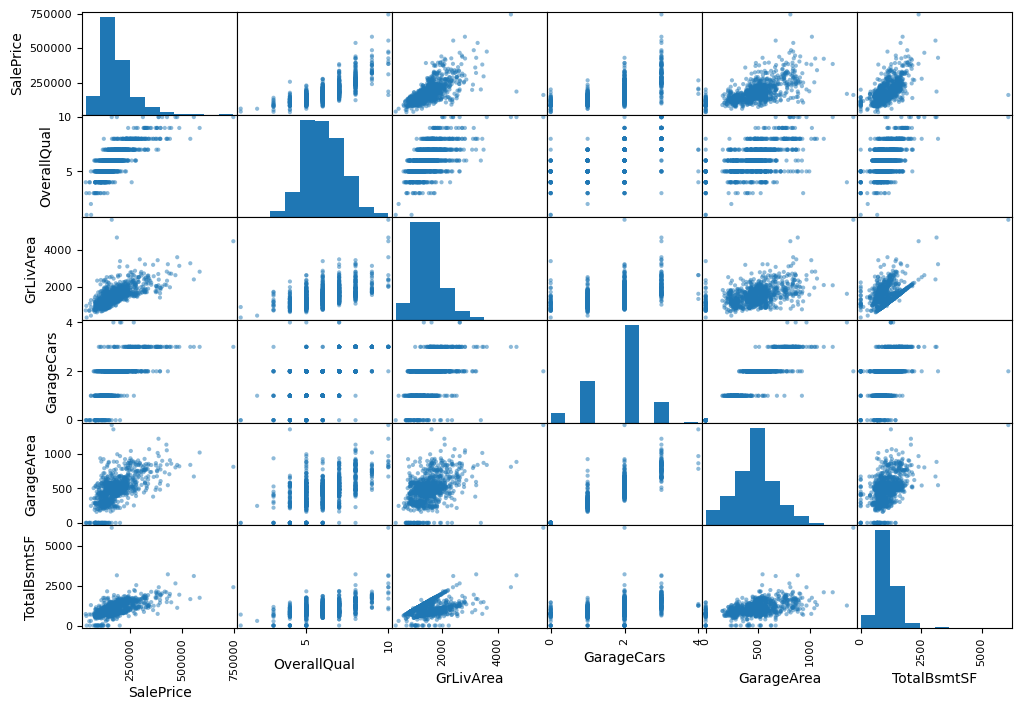

In [474]:
from pandas.plotting import scatter_matrix

attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF"]
scatter_matrix(housing_train[attributes], figsize=(12,8))


In [475]:
#Feature Engineering
crime_rate_mapping = {
    'Blmngtn': 41.8,
    'Blueste': 28.95,
    'BrDale': 25.15,
    'BrkSide': 25.15,
    'ClearCr': 28.95,
    'CollgCr': 10.50,
    'Crawfor': 26.16,
    'Edwards': 28.95,
    'Gilbert': 9.12,
    'IDOTRR': 28.95,
    'MeadowV': 28.95,
    'Mitchel': 19.37,
    'Names': 8,
    'NoRidge': 7.58,
    'NPkVill': 28.95,
    'NridgHt': 17.13,
    'NWAmes': 17.13,
    'OldTown': 24.59,
    'SWISU': 104.2,
    'Sawyer': 20.97,
    'SawyerW': 20.97,
    'Somerst': 37,
    'StoneBr': 28.95,
    'Timber': 30,
    'Veenker': 28.95
}

housing_train['Crime_Rate' ] = housing_train['Neighborhood'].map(crime_rate_mapping)
pd.set_option('display.max_columns', None)
housing_train

#I just thought it would be intresting to look at the crime ratings associated for those areas. I used chat to get those values one by one. 
#however, after anayzing, I dont think it made a big difference at all

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Crime_Rate
251,252,120,RM,44.0,4750,Pave,NaN,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,TwnhsE,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,Stone,481.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1573,Unf,0,0,1573,GasA,Ex,Y,SBrkr,1625,0,0,1625,1,1,2,0,2,1,Gd,5,Typ,1,Gd,Attchd,2006.0,Fin,2,538,TA,TA,Y,123,0,0,0,153,0,NaN,NaN,NaN,0,12,2007,WD,Family,235000,26.16
861,862,190,RL,75.0,11625,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,2fmCon,1Story,5,4,1965,1965,Hip,CompShg,Plywood,HdBoard,NaN,0.0,TA,TA,PConc,TA,TA,Mn,BLQ,841,Unf,0,198,1039,GasA,Ex,Y,SBrkr,1039,0,0,1039,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Unf,2,504,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,131500,20.97
851,852,120,RL,NaN,3196,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,8,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,40.0,Gd,TA,PConc,Gd,TA,Gd,Unf,0,Unf,0,1273,1273,GasA,Ex,Y,SBrkr,1456,0,0,1456,0,0,2,0,2,1,Gd,7,Typ,1,TA,Attchd,2003.0,Fin,2,400,TA,TA,Y,143,20,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,215000,41.80
582,583,90,RL,81.0,11841,Grvl,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,SFoyer,6,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,BrkFace,104.0,TA,Gd,CBlock,Gd,TA,Av,GLQ,816,Unf,0,0,816,GasA,TA,Y,SBrkr,816,0,0,816,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,32,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,118500,28.95
326,327,120,RL,32.0,10846,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Veenker,Norm,Norm,TwnhsE,1Story,8,5,1993,1993,Gable,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1619,Unf,0,100,1719,GasA,Ex,Y,SBrkr,1719,0,0,1719,2,0,1,1,1,1,Gd,6,Typ,2,Gd,Attchd,1993.0,Fin,2,473,TA,TA,Y,122,30,0,0,0,0,NaN,NaN,NaN,0,5,2008,Con,Normal,324000,28.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,20,RL,60.0,6960,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1970,1970,Gable,CompShg,HdBoard,Plywood,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,375,BLQ,239,250,864,GasA,TA,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1989.0,Unf,2,660,TA,TA,Y,96,0,0,0,0,0,NaN,NaN,Shed,500,11,2009,WD,Normal,120500,NaN
401,402,20,RL,65.0,8767,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,24,Unf,0,1286,1310,GasA,Ex,Y,SBrkr,1310,0,0,1310,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2005.0,Fin,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,164990,10.50
957,958,20,RL,70.0,7420,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1962,1962,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,417,Unf,0,640,1057,GasA,TA,Y,SBrkr,1057,0,0,1057,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1977.0,Fin,2,576,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal,132000,20.97
992,993,60,RL,80.0,9760,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,2Story,6,8,1964,1993,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFac

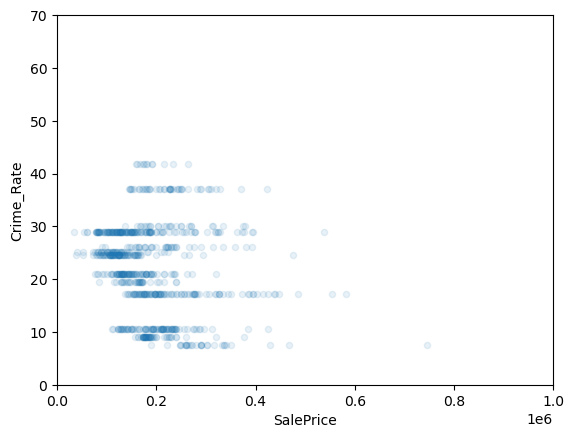

(39, 39)

In [476]:
housing_train.plot(kind="scatter", x="SalePrice", y='Crime_Rate', alpha =0.1)
plt.axis([0,1000000,0,70])
plt.show()

c_m = housing_train.corr(numeric_only=True)
c_m.shape

In [477]:
# Your code to visualize the data here
corr_matrix = housing_train.corr(numeric_only=True)
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.777892
GrLivArea        0.674807
GarageCars       0.637454
GarageArea       0.616631
TotalBsmtSF      0.593411
1stFlrSF         0.588018
FullBath         0.550514
YearBuilt        0.515217
TotRmsAbvGrd     0.508304
YearRemodAdd     0.492897
GarageYrBlt      0.479604
Fireplaces       0.464652
MasVnrArea       0.440977
BsmtFinSF1       0.351121
LotFrontage      0.313306
WoodDeckSF       0.307913
2ndFlrSF         0.284592
OpenPorchSF      0.281425
HalfBath         0.266244
LotArea          0.239065
BsmtUnfSF        0.229066
BsmtFullBath     0.228611
BedroomAbvGr     0.157942
ScreenPorch      0.139919
PoolArea         0.131198
3SsnPorch        0.090449
MoSold           0.017851
BsmtFinSF2       0.010182
LowQualFinSF     0.009869
YrSold           0.003952
Id              -0.008787
MiscVal         -0.020882
BsmtHalfBath    -0.045244
MSSubClass      -0.088854
OverallCond     -0.095197
EnclosedPorch   -0.133094
KitchenAbvGr    -0.137487
Crime_Rate  

In [478]:
#Lets do some more Feature Engineering:
housing_train['OverallQual_Squared'] = housing_train['OverallQual'] **2
housing_train['GrLivArea_Squared'] = housing_train['GrLivArea']** 2
housing_train['Garage_Cars_Area'] = housing_train['GarageArea']*housing_train['GarageCars']
housing_train['Total_SF'] = housing_train['TotalBsmtSF']+housing_train['1stFlrSF']+housing_train['2ndFlrSF']-housing_train['LowQualFinSF']+housing_train['WoodDeckSF']+ housing_train['OpenPorchSF']
housing_train['total_pos'] = housing_train['TotRmsAbvGrd'] + housing_train['Fireplaces']+housing_train['GarageCars']
housing_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Crime_Rate,OverallQual_Squared,GrLivArea_Squared,Garage_Cars_Area,Total_SF,total_pos
251,252,120,RM,44.0,4750,Pave,NaN,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,TwnhsE,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,Stone,481.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1573,Unf,0,0,1573,GasA,Ex,Y,SBrkr,1625,0,0,1625,1,1,2,0,2,1,Gd,5,Typ,1,Gd,Attchd,2006.0,Fin,2,538,TA,TA,Y,123,0,0,0,153,0,NaN,NaN,NaN,0,12,2007,WD,Family,235000,26.16,64,2640625,1076,3321,8
861,862,190,RL,75.0,11625,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,2fmCon,1Story,5,4,1965,1965,Hip,CompShg,Plywood,HdBoard,NaN,0.0,TA,TA,PConc,TA,TA,Mn,BLQ,841,Unf,0,198,1039,GasA,Ex,Y,SBrkr,1039,0,0,1039,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Unf,2,504,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,131500,20.97,25,1079521,1008,2078,8
851,852,120,RL,NaN,3196,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,8,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,40.0,Gd,TA,PConc,Gd,TA,Gd,Unf,0,Unf,0,1273,1273,GasA,Ex,Y,SBrkr,1456,0,0,1456,0,0,2,0,2,1,Gd,7,Typ,1,TA,Attchd,2003.0,Fin,2,400,TA,TA,Y,143,20,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,215000,41.80,64,2119936,800,2892,10
582,583,90,RL,81.0,11841,Grvl,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,SFoyer,6,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,BrkFace,104.0,TA,Gd,CBlock,Gd,TA,Av,GLQ,816,Unf,0,0,816,GasA,TA,Y,SBrkr,816,0,0,816,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,32,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,118500,28.95,36,665856,0,1664,5
326,327,120,RL,32.0,10846,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Veenker,Norm,Norm,TwnhsE,1Story,8,5,1993,1993,Gable,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1619,Unf,0,100,1719,GasA,Ex,Y,SBrkr,1719,0,0,1719,2,0,1,1,1,1,Gd,6,Typ,2,Gd,Attchd,1993.0,Fin,2,473,TA,TA,Y,122,30,0,0,0,0,NaN,NaN,NaN,0,5,2008,Con,Normal,324000,28.95,64,2954961,946,3590,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,20,RL,60.0,6960,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1970,1970,Gable,CompShg,HdBoard,Plywood,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,375,BLQ,239,250,864,GasA,TA,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1989.0,Unf,2,660,TA,TA,Y,96,0,0,0,0,0,NaN,NaN,Shed,500,11,2009,WD,Normal,120500,NaN,16,746496,1320,1824,7
401,402,20,RL,65.0,8767,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,24,Unf,0,1286,1310,GasA,Ex,Y,SBrkr,1310,0,0,1310,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2005.0,Fin,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,164990,10.50,49,1716100,800,2620,9
957,958,20,RL,70.0,7420,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1962,1962,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,417,Unf,0,640,1057,GasA,TA,Y,SBrkr,1057,0,0,1057,0

In [479]:
corr_matrix = housing_train.corr(numeric_only=True)
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice              1.000000
OverallQual_Squared    0.802492
OverallQual            0.777892
Total_SF               0.754204
total_pos              0.688538
GrLivArea              0.674807
Garage_Cars_Area       0.670521
GarageCars             0.637454
GarageArea             0.616631
GrLivArea_Squared      0.594529
TotalBsmtSF            0.593411
1stFlrSF               0.588018
FullBath               0.550514
YearBuilt              0.515217
TotRmsAbvGrd           0.508304
YearRemodAdd           0.492897
GarageYrBlt            0.479604
Fireplaces             0.464652
MasVnrArea             0.440977
BsmtFinSF1             0.351121
LotFrontage            0.313306
WoodDeckSF             0.307913
2ndFlrSF               0.284592
OpenPorchSF            0.281425
HalfBath               0.266244
LotArea                0.239065
BsmtUnfSF              0.229066
BsmtFullBath           0.228611
BedroomAbvGr           0.157942
ScreenPorch            0.139919
PoolArea               0.131198
3SsnPorc

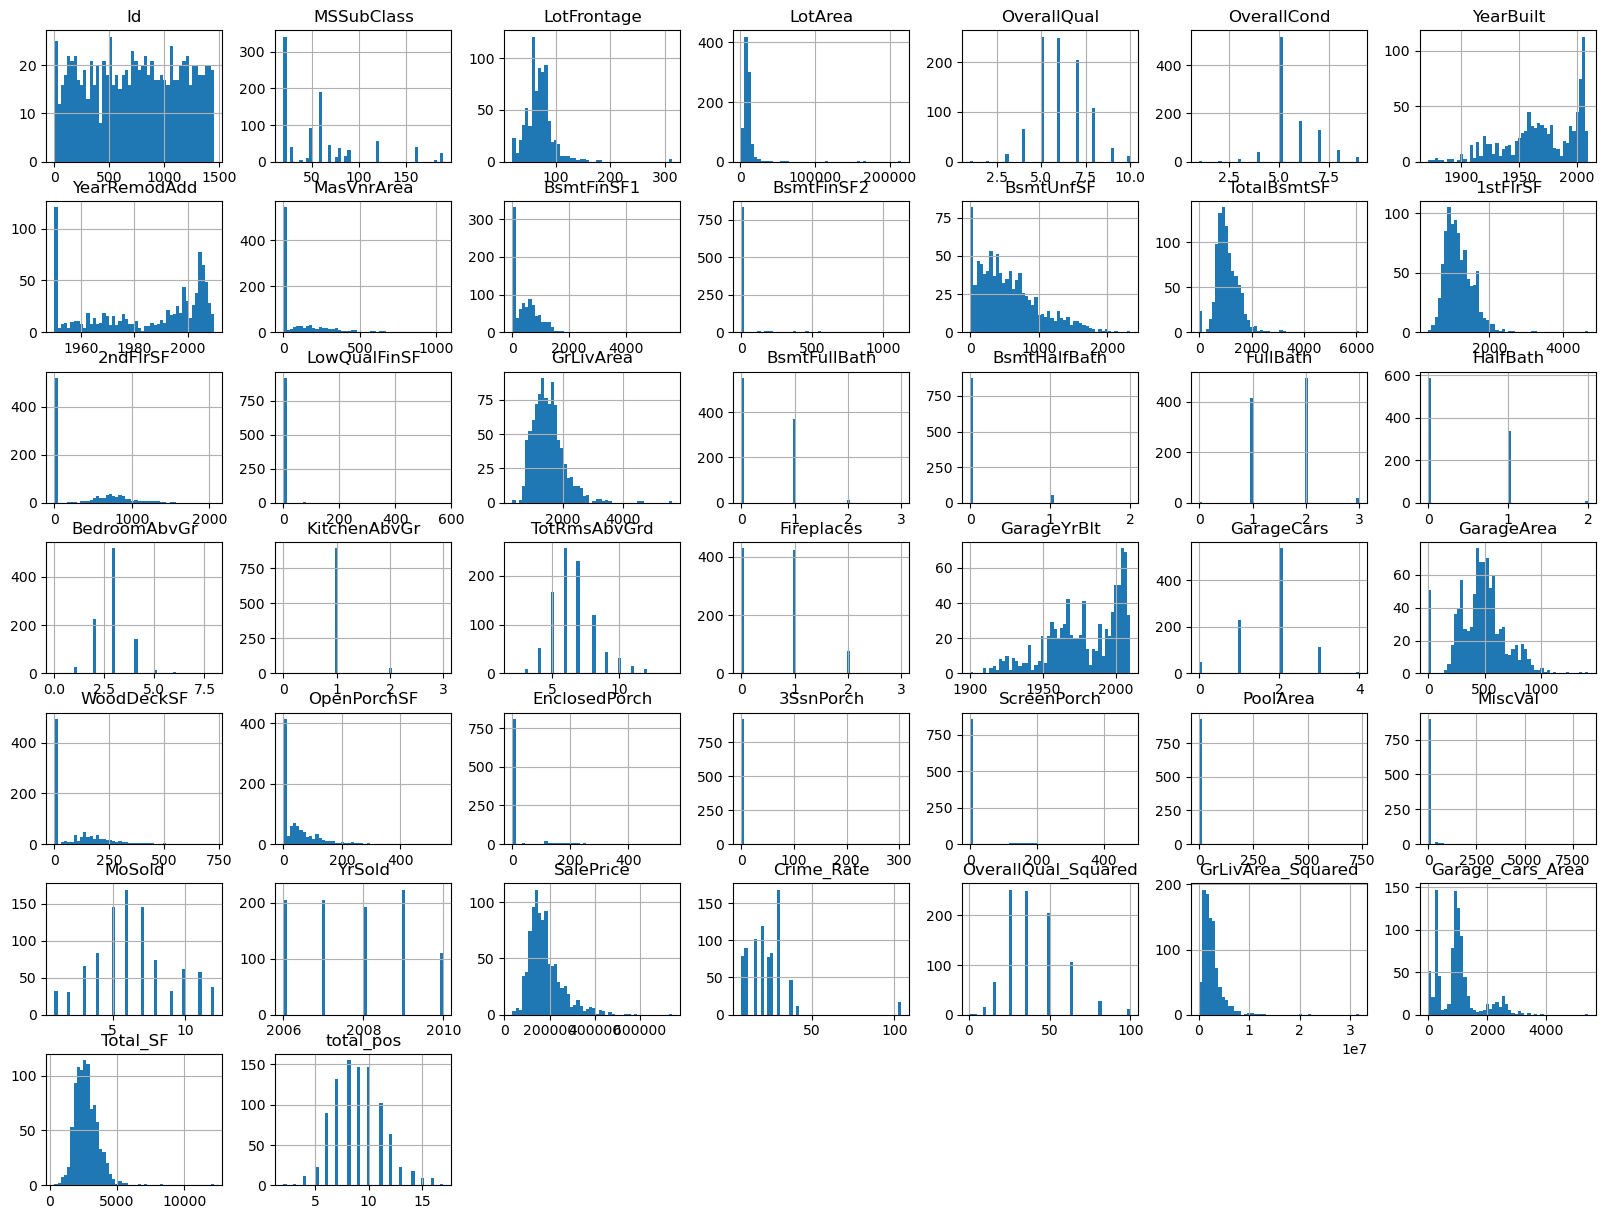

In [480]:
housing_train.hist(bins=50, figsize=(20,15))
plt.show()


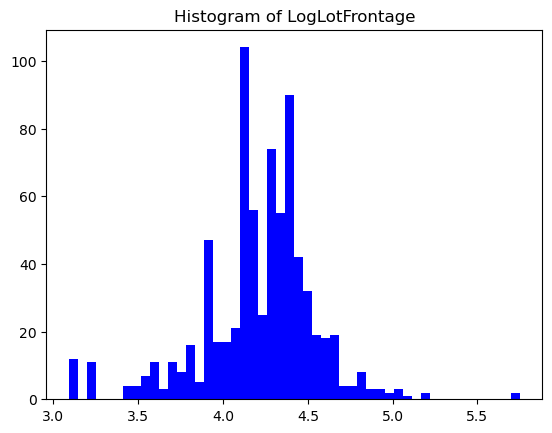

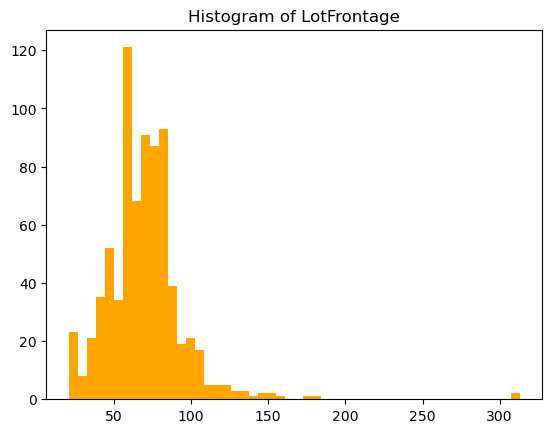

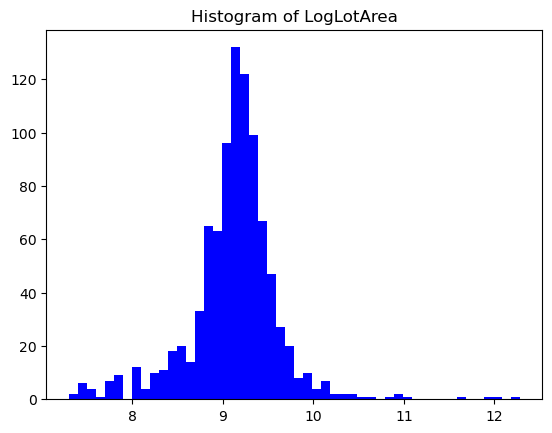

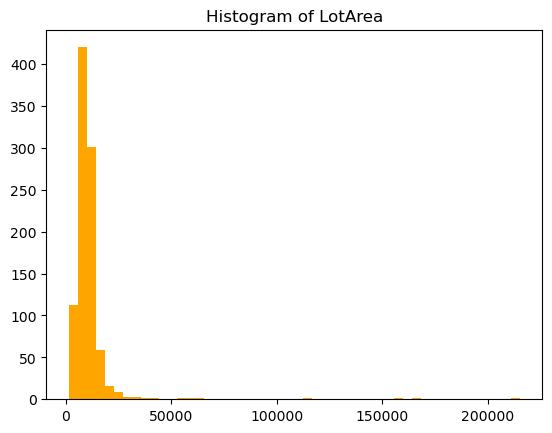

In [481]:
#Now lets fix the distribution of some of the features that have scewed dist.
housing_train['LogLotFrontage']= np.log1p(housing_train['LotFrontage'])
plt.hist(housing_train['LogLotFrontage'], bins=50, color='blue')
plt.title('Histogram of LogLotFrontage')
plt.show()
plt.hist(housing_train['LotFrontage'], bins =50, color='orange')
plt.title('Histogram of LotFrontage')
plt.show()

housing_train['LogLotArea']= np.log1p(housing_train['LotArea'])
plt.hist(housing_train['LogLotArea'], bins=50, color='blue')
plt.title('Histogram of LogLotArea')
plt.show()
plt.hist(housing_train['LotArea'], bins =50, color='orange')
plt.title('Histogram of LotArea')
plt.show()



In [482]:
corr_matrix = housing_train.corr(numeric_only=True)
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice              1.000000
OverallQual_Squared    0.802492
OverallQual            0.777892
Total_SF               0.754204
total_pos              0.688538
GrLivArea              0.674807
Garage_Cars_Area       0.670521
GarageCars             0.637454
GarageArea             0.616631
GrLivArea_Squared      0.594529
TotalBsmtSF            0.593411
1stFlrSF               0.588018
FullBath               0.550514
YearBuilt              0.515217
TotRmsAbvGrd           0.508304
YearRemodAdd           0.492897
GarageYrBlt            0.479604
Fireplaces             0.464652
MasVnrArea             0.440977
LogLotArea             0.376117
BsmtFinSF1             0.351121
LogLotFrontage         0.318853
LotFrontage            0.313306
WoodDeckSF             0.307913
2ndFlrSF               0.284592
OpenPorchSF            0.281425
HalfBath               0.266244
LotArea                0.239065
BsmtUnfSF              0.229066
BsmtFullBath           0.228611
BedroomAbvGr           0.157942
ScreenPo

##  Step 4: Data Preparation and Cleaning
Since we can only use the "train.csv", you have to "artificially" split the data into training set, validation set, and test set. You may use the `train_test_split()` function *twice*: first is to split into train and test, then to split the train again into training and validation sets.

Next, you need to construct the following:

* **Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the `Imputer` class.

* **Feature Scaling:** Your task is to call the `StandardScaler` to normalize the value of each feature.

* **Transformation Pipeline:** More importantly, you will need to integrate the above operations into a `Pipeline` to process and transform the training data (via `fit_transform()`), then use the same pipeline to transform any validation and testing data (using `transform()` only).

In [483]:
# Your code check for missing values, feature scaling, and put all transformation into a pipeline here
housing = actual_train_set.drop("SalePrice", axis =1)
housing_labels = actual_train_set['SalePrice'].copy()

In [484]:
#check for missing values:
incomplete_rows = housing[housing.isnull().any(axis=1)]
incomplete_rows

nan_count = housing.isna().sum()

nan_count = nan_count[nan_count > 0]

print(nan_count)
#from this I am going to drop the column: Misc Feature 
#because it will basically be guessing. same with PoolQC, Fence
#and Alley

"""incomplete_rows.drop("Alley", axis=1)
incomplete_rows.drop("MiscFeature", axis=1)
incomplete_rows.drop( "Fence", axis=1)
incomplete_rows.drop("PoolQC", axis=1)

incomplete_rows"""


LotFrontage     174
Alley           873
MasVnrType      542
MasVnrArea        5
BsmtQual         23
BsmtCond         23
BsmtExposure     23
BsmtFinType1     23
BsmtFinType2     23
Electrical        1
FireplaceQu     429
GarageType       51
GarageYrBlt      51
GarageFinish     51
GarageQual       51
GarageCond       51
PoolQC          928
Fence           749
MiscFeature     896
dtype: int64


'incomplete_rows.drop("Alley", axis=1)\nincomplete_rows.drop("MiscFeature", axis=1)\nincomplete_rows.drop( "Fence", axis=1)\nincomplete_rows.drop("PoolQC", axis=1)\n\nincomplete_rows'

In [485]:
"""#For the rest of the n/a values lets just compute the median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")"""

'#For the rest of the n/a values lets just compute the median\nfrom sklearn.impute import SimpleImputer\nimputer = SimpleImputer(strategy = "median")'

In [486]:
"""text_cols = housing.select_dtypes(include=['object']).columns
housing_num = housing.drop(columns=text_cols)

housing_num.head()"""

"text_cols = housing.select_dtypes(include=['object']).columns\nhousing_num = housing.drop(columns=text_cols)\n\nhousing_num.head()"

In [487]:
"""imputer.fit(housing_num)"""

'imputer.fit(housing_num)'

In [488]:
"""imputer.statistics_"""

'imputer.statistics_'

In [489]:
"""housing_num.median().values"""


'housing_num.median().values'

In [490]:
"""#transform onto the traing set
X = imputer.transform(housing_num)"""

'#transform onto the traing set\nX = imputer.transform(housing_num)'

In [491]:
"""housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)"""

'housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)'

In [492]:
"""housing_tr.loc[incomplete_rows.index.values]"""

'housing_tr.loc[incomplete_rows.index.values]'

In [493]:
#now we need to deal with the text based features

"""housing_cat = housing.select_dtypes(include=['object'])
housing_cat"""

"housing_cat = housing.select_dtypes(include=['object'])\nhousing_cat"

In [494]:
#we are going to use an Ordinal Encoder for the categories that have
#rankings for their values:
#LotShape, LandSlope, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, 
#ect.
"""
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

columns_to_OE = ['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 
                 "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
                 "HeatingQC", "KitchenQual", "Functional", "FireplaceQu", "GarageFinish",
                 "GarageQual", "GarageCond"]


housing_cat_ordinal_encoded = pd.DataFrame(ordinal_encoder.fit_transform(housing_cat[columns_to_OE]), columns = columns_to_OE)



housing_cat_remaining = housing_cat.drop(columns=columns_to_OE)

housing_cat_ordinal_encoded.head()"""

'\nfrom sklearn.preprocessing import OrdinalEncoder\nordinal_encoder = OrdinalEncoder()\n\ncolumns_to_OE = [\'LotShape\', \'LandSlope\', \'ExterQual\', \'ExterCond\', \'BsmtQual\', \n                 "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", \n                 "HeatingQC", "KitchenQual", "Functional", "FireplaceQu", "GarageFinish",\n                 "GarageQual", "GarageCond"]\n\n\nhousing_cat_ordinal_encoded = pd.DataFrame(ordinal_encoder.fit_transform(housing_cat[columns_to_OE]), columns = columns_to_OE)\n\n\n\nhousing_cat_remaining = housing_cat.drop(columns=columns_to_OE)\n\nhousing_cat_ordinal_encoded.head()'

In [495]:
#Now for the rest of the columns we are just going to do a OneHotEncoder
"""from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
print(housing_cat_remaining.columns)
housing_cat_1hot = pd.DataFrame(onehot_encoder.fit_transform(housing_cat_remaining), 
                                columns = onehot_encoder.get_feature_names_out(housing_cat_remaining.columns))

housing_cat_final = pd.concat([housing_cat_ordinal_encoded, housing_cat_1hot], axis=1)
housing_cat_final.head()"""



'from sklearn.preprocessing import OneHotEncoder\nonehot_encoder = OneHotEncoder(sparse=False)\nprint(housing_cat_remaining.columns)\nhousing_cat_1hot = pd.DataFrame(onehot_encoder.fit_transform(housing_cat_remaining), \n                                columns = onehot_encoder.get_feature_names_out(housing_cat_remaining.columns))\n\nhousing_cat_final = pd.concat([housing_cat_ordinal_encoded, housing_cat_1hot], axis=1)\nhousing_cat_final.head()'

In [496]:
#now we need to create the pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

housing_cat = housing.select_dtypes(include=['object'])
housing_num = housing.drop(columns=housing_cat.columns)
#lets start with the custom transformer to drop specified columns
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=self.columns)

overallqual_ix = 199  
grlivarea_ix = 211   
garagearea_ix = 222 
garagecars_ix = 221   
totalbsmt_ix = 207   
firstflr_ix = 208     
secondflr_ix = 209    
lowqualfinsf_ix = 210 
wooddecksf_ix = 223   
openporchsf_ix = 224 
totrms_ix = 218    
fireplaces_ix = 219

#like we did in class, this custom transformer makes new features. 
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self): 
        pass

    def fit(self, X, y=None):
        return self  

    def transform(self, X, y=None):
        overallqual_squared = X[:, overallqual_ix] ** 2
        grlivarea_squared = X[:, grlivarea_ix] ** 2
        garage_cars_area = X[:, garagearea_ix] * X[:, garagecars_ix]
        total_sf = (X[:, totalbsmt_ix] + X[:, firstflr_ix] + X[:, secondflr_ix] 
                    - X[:, lowqualfinsf_ix] + X[:, wooddecksf_ix] + X[:, openporchsf_ix])
        total_pos = X[:, totrms_ix] + X[:, fireplaces_ix] + X[:, garagecars_ix]

        return np.c_[X, overallqual_squared, grlivarea_squared, garage_cars_area, total_sf, total_pos]


columns_to_drop = ['Alley', 'MiscFeature', 'Fence', 'PoolQC']
columns_to_ordinal_encode = ['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 
                 "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
                 "HeatingQC", "KitchenQual", "Functional", "FireplaceQu", "GarageFinish",
                 "GarageQual", "GarageCond"]
columns_to_1hot = ['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition']
new_feature_columns = ['OverallQual_Squared', 'GrLivArea_Squared', 'Garage_Cars_Area', 'Total_SF', 'total_pos']
#pipeline to drop columns

drop_pipeline = Pipeline(steps =[
    ('drop_columns', DropColumns(columns=columns_to_drop))
])

ordinal_pipeline = Pipeline(steps=[
    ('ordinal_encoder', OrdinalEncoder()),
    ('imputer', SimpleImputer(strategy = 'median'))
])

onehot_pipeline = Pipeline(steps=[
    ('1hot_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('imputer', SimpleImputer(strategy='median'))
])

numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),

])

process = ColumnTransformer(
    transformers=[
        ('drop', drop_pipeline, columns_to_drop),
        ('ordinal', ordinal_pipeline, columns_to_ordinal_encode),
        ('1hot', onehot_pipeline, columns_to_1hot),
        ('numerical', numerical_pipeline, housing_num.columns), 
        
    ],
    remainder='passthrough'
)

final_pipeline = Pipeline(steps=[
    ('preprocessor', process),
    ('feature_engineering', CombinedAttributesAdder()),
    ('scaler', StandardScaler())
])

#this part was annoyying to figure out and I need to figure out if there is some way to incorporate this into the pipeline of steps
housing_transformed = final_pipeline.fit_transform(housing)

ordinal_encoded_columns = columns_to_ordinal_encode
onehot_encoded_columns = final_pipeline.named_steps['preprocessor'].named_transformers_['1hot'].named_steps['1hot_encoder'].get_feature_names_out(columns_to_1hot)
numerical_columns = housing_num.columns
remainder_columns = housing_cat.drop(columns=columns_to_ordinal_encode + columns_to_1hot).columns
final_column_names = list(ordinal_encoded_columns) + list(onehot_encoded_columns)+ list(numerical_columns)  +new_feature_columns+ list(remainder_columns)

housing_transformed = pd.DataFrame(housing_transformed, columns=final_column_names)
housing_transformed.head()


/root/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_nan,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,MasVnrType_nan,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Electrical_nan,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_nan,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_nan,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_nan,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,OverallQual_Squared,GrLivArea_Squared,Garage_Cars_Area,Total_SF,total_pos
0,-1.363810,3.298099,-0.760711,0.385787,-0.321740,0.281991,-1.146551,-0.381776,0.293184,-0.904427,-0.403480,0.274622,-0.419342,-1.476547,0.202564,0.177097,-0.065583,-0.197312,-0.118807,-1.953057,2.361666,-0.056766,0.056766,-0.200223,-0.16584,0.264337,-0.205939,5.309190,-0.147925,-3.062316,0.032739,-0.032739,-0.486915,-0.2

In [497]:
incomplete_rows = housing_transformed[housing_transformed.isnull().any(axis=1)]
incomplete_rows

nan_count = housing_transformed.isna().sum()

nan_count = nan_count[nan_count > 0]

print(nan_count)



Series([], dtype: int64)


## Step 5: Model Selection
You should use (at the minimum) the basic ML models which we’ve covered: `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. Optionally, you may go for the extra miles by doing some research and try some more advanced models (ie. `Artificial Neural Networks`). You may use `RMSE` as the performance measure.

You must use 5-fold CV on the data set to evaluate the performance of your models (following the sample codes on Colab 02).


In [498]:
# Try a few models here
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_transformed, housing_labels)


LinearRegression()

In [499]:
#mse
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_transformed)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse 

18330.46072806928

In [500]:
#mae
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

12536.695541199604

In [501]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_transformed, housing_labels)

DecisionTreeRegressor(random_state=42)

In [502]:
housing_predictions = tree_reg.predict(housing_transformed)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [503]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_transformed, housing_labels,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

In [504]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("STD: ", scores.std())
    
display_scores(tree_rmse_scores)



Scores:  [35544.03323596 55610.25779226 31016.71301899 39708.05971664
 36596.75601986]
Mean:  39695.163956743636
STD:  8431.345168800299


In [505]:
lin_scores = cross_val_score(lin_reg, housing_transformed, housing_labels,
                             scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


#something is wrong here...

Scores:  [2.24162125e+17 6.90780679e+17 5.49194883e+17 6.34755810e+16
 7.37925675e+16]
Mean:  3.202811670946337e+17
STD:  2.5519247113428986e+17


In [506]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=50, random_state=42)
forest_reg.fit(housing_transformed, housing_labels)

RandomForestRegressor(n_estimators=50, random_state=42)

In [507]:
housing_predictions = forest_reg.predict(housing_transformed)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

12162.421937758472

In [508]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_transformed, housing_labels,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [28747.23437892 46946.4267157  23680.36450196 27459.9255978
 25013.10312369]
Mean:  30369.410863611025
STD:  8477.350876930765


In [509]:
#something is going wrong with linReg. Maybe its just super overfitting?
#not entirely sure
scores = cross_val_score(lin_reg, housing_transformed, housing_labels, scoring="neg_mean_squared_error", cv=5)
pd.Series(np.sqrt(-scores)).describe()

count    5.000000e+00
mean     3.202812e+17
std      2.853139e+17
min      6.347558e+16
25%      7.379257e+16
50%      2.241621e+17
75%      5.491949e+17
max      6.907807e+17
dtype: float64

## Step 6: Model Tuning

In this step, you should attempt to use one of the provided tools for hyperparameter tuning: `GridSearchCV`, `RandomizedSearchCV` to identify the best set of hyperparameters for your model. After tweaking your models, you eventually should report the 5-fold CV RMSE of your tuned model.

In [510]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30, 50, 60, 75, 90], 'max_features': [2, 4, 6, 8, 10, 12, 14]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of 90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_transformed, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8, 10, 12, 14],
                          'n_estimators': [3, 10, 30, 50, 60, 75, 90]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [511]:
print("Best Params: ", grid_search.best_params_)
print("Best Estimator: ", grid_search.best_estimator_)

Best Params:  {'max_features': 10, 'n_estimators': 50}
Best Estimator:  RandomForestRegressor(max_features=10, n_estimators=50, random_state=42)


In [512]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=50, max_features=10, random_state=42)
forest_reg.fit(housing_transformed, housing_labels)

RandomForestRegressor(max_features=10, n_estimators=50, random_state=42)

In [513]:
from sklearn.model_selection import cross_val_score
import numpy as np

top_scores = cross_val_score(forest_reg, housing_transformed, housing_labels, cv=5, scoring="neg_mean_squared_error")
top_rmse_scores = np.sqrt(-top_scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

display_scores(top_rmse_scores)

Scores:  [28594.79105202 43348.7471848  22887.57967417 29222.98622858
 27393.13251925]
Mean:  30289.447331766038
Standard Deviation:  6895.372305486123


In [514]:

feature_importances = forest_reg.feature_importances_

features = final_column_names 
feature_importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
print(feature_importances_df)
top_n = 15

top_features = feature_importances_df['Feature'].head(top_n).values
top_features = list(top_features)
features_drop = ['GarageCars','TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'TotalBsmtSF']

for feature in features_drop:
    if feature in top_features:
        top_features.remove(feature)
        
print(f"Top {top_n} important features: ", top_features)


                 Feature  Importance
199          OverallQual    0.067252
235             Total_SF    0.061325
232  OverallQual_Squared    0.057231
211            GrLivArea    0.052957
208             1stFlrSF    0.040759
..                   ...         ...
142      Foundation_Wood    0.000000
99         RoofMatl_Roll    0.000000
178     MiscFeature_TenC    0.000000
183       SaleType_ConLD    0.000000
147         Heating_OthW    0.000000

[237 rows x 2 columns]
Top 15 important features:  ['OverallQual', 'Total_SF', 'OverallQual_Squared', 'GrLivArea', '1stFlrSF', 'YearBuilt', 'Garage_Cars_Area', 'BsmtQual', 'total_pos', 'KitchenQual', 'GrLivArea_Squared']


In [515]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

43923.08072034039 {'max_features': 2, 'n_estimators': 3}
37981.27699375684 {'max_features': 2, 'n_estimators': 10}
35624.38566927249 {'max_features': 2, 'n_estimators': 30}
35223.76558229979 {'max_features': 2, 'n_estimators': 50}
35347.54253296887 {'max_features': 2, 'n_estimators': 60}
35119.68507914243 {'max_features': 2, 'n_estimators': 75}
35060.378110014026 {'max_features': 2, 'n_estimators': 90}
39565.63696511012 {'max_features': 4, 'n_estimators': 3}
36870.21923520694 {'max_features': 4, 'n_estimators': 10}
35100.056772460586 {'max_features': 4, 'n_estimators': 30}
34189.77288338836 {'max_features': 4, 'n_estimators': 50}
34162.67097953059 {'max_features': 4, 'n_estimators': 60}
34131.35271631337 {'max_features': 4, 'n_estimators': 75}
33959.42864580064 {'max_features': 4, 'n_estimators': 90}
39976.217053040884 {'max_features': 6, 'n_estimators': 3}
34505.254632110256 {'max_features': 6, 'n_estimators': 10}
33395.42040275326 {'max_features': 6, 'n_estimators': 30}
33382.4871471

In [516]:
"""top_features_10 = pd.DataFrame(housing_transformed, columns=features)[top_features]
from sklearn.ensemble import RandomForestRegressor

# Train a new RandomForest model on the reduced dataset
forest_reg_top = RandomForestRegressor(random_state=42, n_estimators=30)
forest_reg_top.fit(top_features_10, housing_labels)"""

'top_features_10 = pd.DataFrame(housing_transformed, columns=features)[top_features]\nfrom sklearn.ensemble import RandomForestRegressor\n\n# Train a new RandomForest model on the reduced dataset\nforest_reg_top = RandomForestRegressor(random_state=42, n_estimators=30)\nforest_reg_top.fit(top_features_10, housing_labels)'

In [517]:
"""from sklearn.model_selection import cross_val_score
import numpy as np

# Perform cross-validation on the new model using the reduced feature set
top_scores = cross_val_score(forest_reg_top, top_features_10, housing_labels, cv=5, scoring="neg_mean_squared_error")

# Convert negative MSE to RMSE
top_rmse_scores = np.sqrt(-top_scores)

# Display the cross-validation results
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

display_scores(top_rmse_scores)"""

'from sklearn.model_selection import cross_val_score\nimport numpy as np\n\n# Perform cross-validation on the new model using the reduced feature set\ntop_scores = cross_val_score(forest_reg_top, top_features_10, housing_labels, cv=5, scoring="neg_mean_squared_error")\n\n# Convert negative MSE to RMSE\ntop_rmse_scores = np.sqrt(-top_scores)\n\n# Display the cross-validation results\ndef display_scores(scores):\n    print("Scores: ", scores)\n    print("Mean: ", scores.mean())\n    print("Standard Deviation: ", scores.std())\n\ndisplay_scores(top_rmse_scores)'

In [518]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("SalePrice", axis=1)
y_test = test_set["SalePrice"].copy()

X_test_prepared = final_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)

final_rmse = np.sqrt(final_mse)

final_rmse

/root/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


33820.216214185384

In [519]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, final_predictions)
lin_mae

18535.679520547947

In [520]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([19292.91247545, 43765.25537185])

## Step 7: Solution Presentation
Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/supervisor). Focus on answering the following:

* How can you pitch your solution to this project?
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution?

The purpose of this project was to predict the sale price of a house based on a given data set of features. The final model took 10 of those features and was able to determine with %95 percent certainty that the sale price will be between $19292 and $43765. If you look at the two graphs below, you can visualize the performance of the model! One of the main points that we learned about the problem from building these models is that the Overall Quality and Square Footage are two of the main features that determine the sale price of a home. The greater the square footage and overall quality, the more money the house is sold for. This makes intuitive sense, but it is interesting to look through the top 10 features per say to see which influence the model the most.  

The next steps to improve this solution is to learn how to construct a better pipeline and learn how to feature engineer at a more complex level. I believe if I had removed more features from the equation of the model, then there might have been less overfitting. 

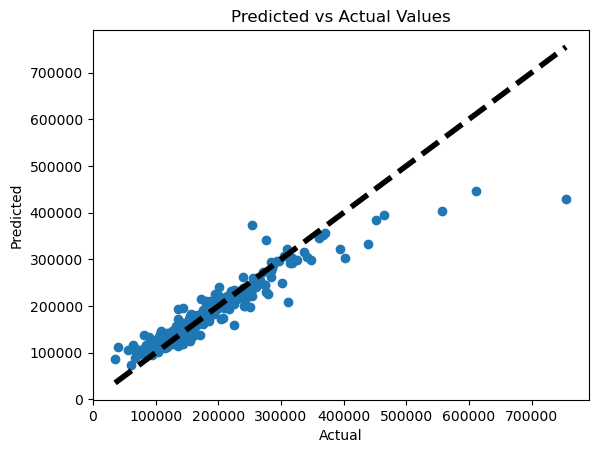

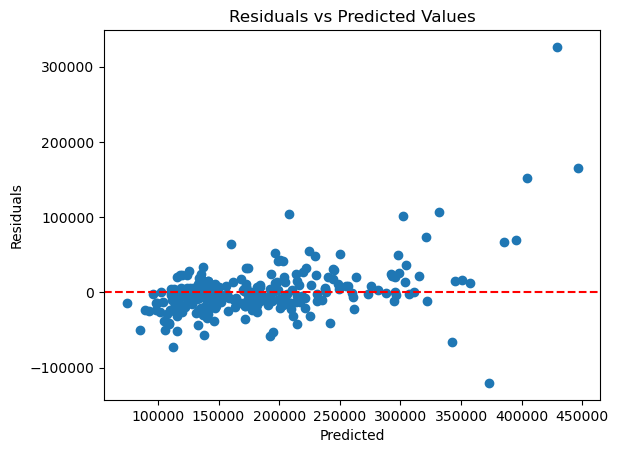

In [521]:
import matplotlib.pyplot as plt

plt.scatter(y_test, final_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Values')
plt.show()

residuals = y_test - final_predictions
plt.scatter(final_predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

## Step 8: Model Launching, Monitoring, and Updating
You don't need to do anything for this step. However, in the real-world, this is an iterative process where you launch, monitor, and update your model (on the cloud).

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my slides and/or the textbook
 * Talk to the TA, they are available and there to help you during their office hours
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Codeathon 1:...".

Best of luck and have fun!